In [9]:
import pandas as pd
DATAFILE = "../data/PurchasingTool FY16-FY18.xlsx"
Purchase_DF = pd.read_excel(DATAFILE)

In [10]:
PCA_feats = ['StdCost', 'PoCost', 'Qty', 'InternalCostSavings', 'PurchLeadTime', 'Spend', 'ABC']
Purch_PCA = Purchase_DF[PCA_feats]
Purch_PCA = Purch_PCA.dropna()

In [11]:
ABC_dict = {'A':1, 'B':2, 'C':3}
Purch_PCA['ABC'] = [ABC_dict[i] for i in Purch_PCA['ABC']]


In [12]:
from sklearn.preprocessing import scale
Purch_PCA = scale(Purch_PCA)

In [19]:
from sklearn.decomposition import PCA
import numpy as np
def PCA_method(data):
    pca_model = PCA()
    pca_fit = pca_model.fit(data)
    print("explained variance")
    print(pca_fit.explained_variance_ratio_)
    var_sum = sum(pca_fit.explained_variance_ratio_)
    print([p for p in pca_fit.explained_variance_ratio_])
    
    print("components")
    # matrix of size n_components X n_features
    # a_i,j tells how much the jth feature contributed to the ith component
    comp = pca_fit.components_
    print(comp)
    # summing along columns tells how much each feature contributes overall
    comp_sum = np.sum(comp, axis = 0)
    print(comp_sum)
    return comp

In [20]:
comp=PCA_method(Purch_PCA) 

explained variance
[ 0.30058613  0.18588271  0.16178145  0.12607179  0.11650984  0.10796916
  0.00119893]
[0.30058612779647881, 0.18588271233445189, 0.16178144998169375, 0.12607178822211734, 0.11650983769078289, 0.107969157658589, 0.0011989263158862504]
components
[[  6.65808260e-01   6.66620842e-01  -5.29501675e-02   1.00755692e-01
   -6.72241802e-02   2.84091533e-01  -1.18884378e-01]
 [  1.26024643e-01   1.25102036e-01   5.14050280e-01  -7.38714087e-02
    5.94788246e-01  -8.28169820e-02   5.81490227e-01]
 [ -1.68421929e-01  -1.66309622e-01   1.42246588e-01   7.62730955e-01
    8.49305304e-02   5.77291872e-01   3.87744899e-02]
 [ -2.37063274e-02  -2.25865956e-02   8.34383246e-01  -1.68614325e-01
   -3.37425678e-01   7.97659096e-02  -3.92534043e-01]
 [ -6.50462332e-02  -6.22380132e-02  -8.90021556e-02  -2.83693750e-01
    6.84749299e-01   2.98583987e-01  -5.87756659e-01]
 [ -9.14718745e-02  -8.50998919e-02  -9.27238074e-02  -5.41955972e-01
   -2.27501457e-01   6.95434208e-01   3.83002

In [23]:
import matplotlib.pyplot as plt

In [36]:
#['StdCost', 'PoCost', 'Qty', 'InternalCostSavings', 'PurchLeadTime', 'Spend', 'ABC']
stdcost = [i[0] for i in comp]
pocost = [i[1] for i in comp]
qty = [i[2] for i in comp]
ICS = [i[3] for i in comp]
PLT = [i[4] for i in comp]
spend = [i[5] for i in comp]
ABC = [i[6] for i in comp]

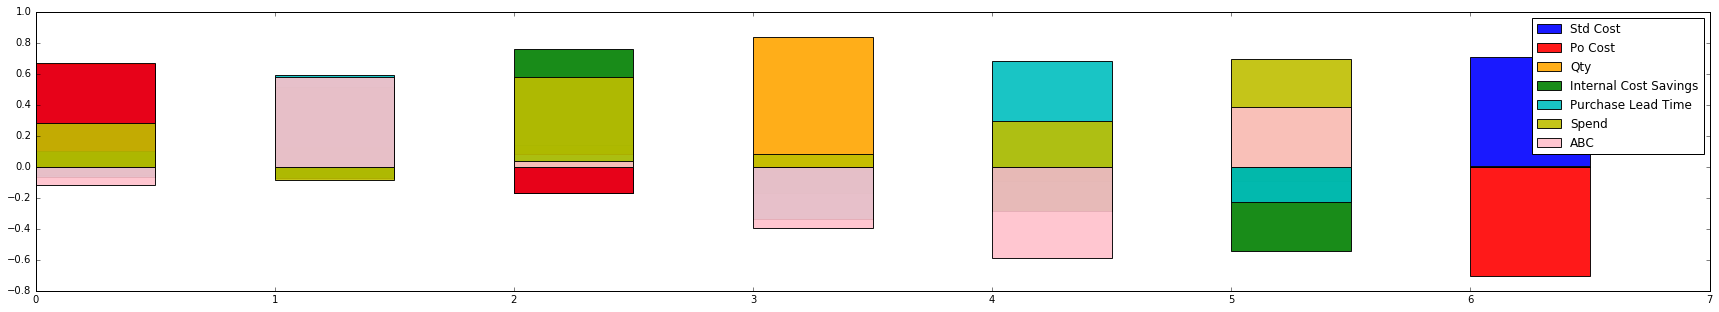

In [56]:
index = np.arange(7)
error_config = {'ecolor': '0.3'}
bw = 0.5
op=0.9
plt.figure(figsize=(30,5))
rects1 = plt.bar(index, stdcost, bw,
                 alpha=op,
                 color='b',
                 error_kw=error_config,
                 label='Std Cost')
rects2 = plt.bar(index, pocost,bw,
                 alpha=op,
                 color='r',
                 error_kw=error_config,
                 label='Po Cost')
rects3 = plt.bar(index, qty, bw,
                 alpha=op,
                 color='orange',
                 error_kw=error_config,
                 label='Qty')
rects4 = plt.bar(index, ICS, bw,
                 alpha=op,
                 color='g',
                 error_kw=error_config,
                 label='Internal Cost Savings')
rects5 = plt.bar(index, PLT, bw,
                 alpha=op,
                 color='c',
                 error_kw=error_config,
                 label='Purchase Lead Time')
rects6 = plt.bar(index, spend, bw,
                 alpha=op,
                 color='y',
                 error_kw=error_config,
                 label='Spend')
rects7 = plt.bar(index, ABC, bw,
                 alpha=op,
                 color='pink',
                 error_kw=error_config,
                 label='ABC')
plt.legend()
plt.show()


#### Tsne

In [53]:
def Labels_to_color (df, classif,label_col):
    """
    For a dataframe (df) and its classification (classif) it 
    turns each class label to numerical values and returns the dataframe
    """
    
    ClassList= df[classif].unique()
    id = 0
    color = ['b', 'g', 'r', 'y',  'w', 'c']

    marker = ['o','x','+','^','s','v']
    ClassDict = {}
    for ClassVal in ClassList:
        
        ClassDict[ClassVal]= color[id]
        id = id+1
    print(ClassDict)
    for ClassNum in ClassDict.keys():
        df.ix[df[classif]==ClassNum,label_col] = ClassDict[ClassNum]
        print (ClassDict[ClassNum])
    df=df.drop(classif,axis =1)
    print(df[label_col].unique())
        
    return df